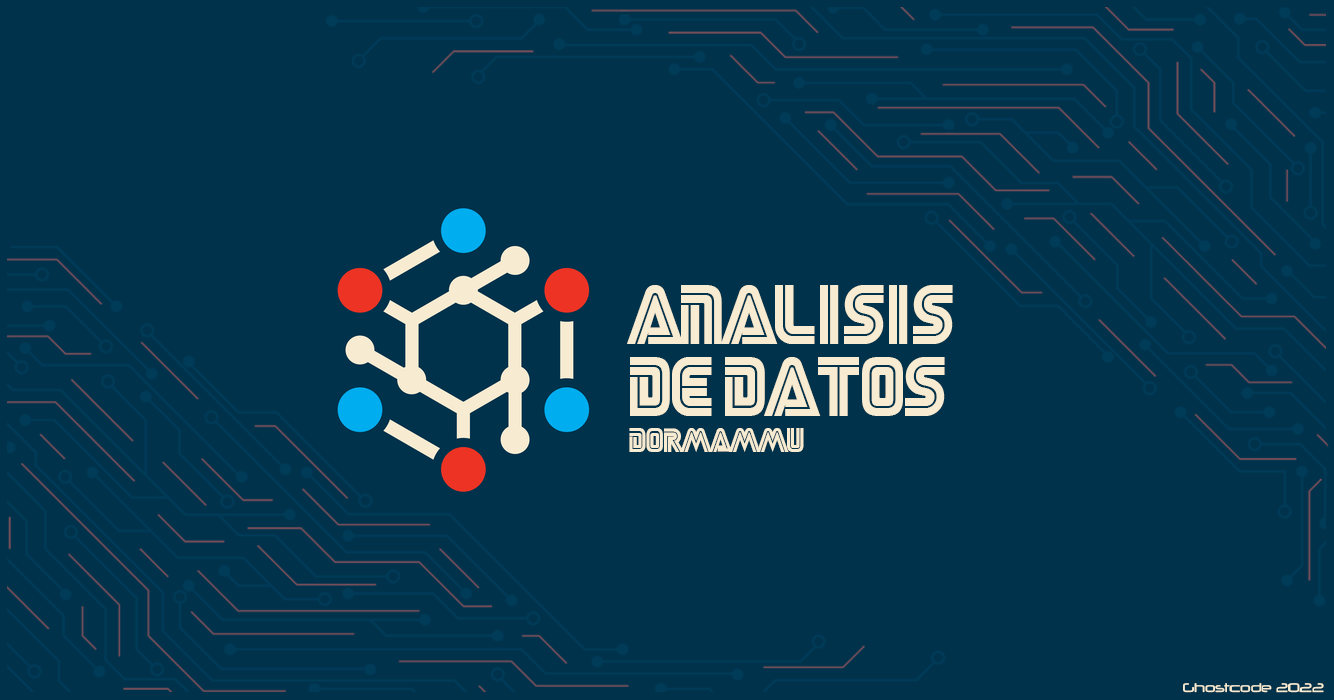

*Equipo: GhostCode*

*Miembros: Daniel Santibañez - Bastian Fierro*

# Análisis de datos
En este cuaderno analizaremos e identificaremos los datos mas relevantes para nuestra etiqueta objetivo: **target**. Una vez hecho el analisis exploratorio inicial, habiendo identificado estos datos especificos necesarios para nuestra etiqueta y haber hecho el preprocesamiento de los datos, procederemos a aplicar un modelo predictivo a la columna **target**.

Primero comenzamos con la importación de librerias:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cargamos nuestro dataset almacenado en nuestro drive, el cual tenemos en formato csv:

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Base_clientes_Monopoly.csv')


Hacemos un rápido analisis de nuestros datos, para verificar que es el dataset correcto:

In [ ]:
display(pd.DataFrame(df))

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0


Tenemos 51124 filas y 574 columnas. Son muchas columnas, pero mas adelante solo usaremos las columnas necesarias para la etiqueta 'target'. Luego, analizamos los tipos de datos de cada columna:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

Id                  int64
Subsegmento         int64
Sexo               object
Region            float64
Edad                int64
Renta             float64
Antiguedad          int64
Internauta          int64
Adicional           int64
Dualidad            int64
Monoproducto        int64
Ctacte              int64
Consumo             int64
Hipotecario         int64
Debito              int64
CambioPin         float64
Cuentas             int64
TC                  int64
CUPO_L1             int64
CUPO_L2           float64
CUPO_MX           float64
FlgAct_T12        float64
FlgActCN_T12      float64
FlgActCI_T12      float64
FlgActAN_T12      float64
FlgActAI_T12      float64
FlgActPAT_T12     float64
FlgActCCPC_T12    float64
FlgActCCOT_T12    float64
FlgActCOL_T12     float64
Fac_T12           float64
Txs_T12           float64
FacCN_T12         float64
TxsCN_T12         float64
FacCI_T12         float64
TxsCI_T12         float64
FacAN_T12         float64
TxsAN_T12         float64
FacAI_T12   

Ahora, identificamos las columnas con missing values:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

Id                    0
Subsegmento           0
Sexo                  0
Region               53
Edad                  0
Renta             13365
Antiguedad            0
Internauta            0
Adicional             0
Dualidad              0
Monoproducto          0
Ctacte                0
Consumo               0
Hipotecario           0
Debito                0
CambioPin         19388
Cuentas               0
TC                    0
CUPO_L1               0
CUPO_L2               0
CUPO_MX               0
FlgAct_T12         8251
FlgActCN_T12       8251
FlgActCI_T12       8251
FlgActAN_T12       8251
FlgActAI_T12       8251
FlgActPAT_T12      8251
FlgActCCPC_T12     8251
FlgActCCOT_T12     8251
FlgActCOL_T12      8251
Fac_T12            8251
Txs_T12            8251
FacCN_T12          8251
TxsCN_T12          8251
FacCI_T12          8251
TxsCI_T12          8251
FacAN_T12          8251
TxsAN_T12          8251
FacAI_T12          8251
TxsAI_T12          8251
FacPAT_T12         8251
TxsPAT_T12      

Para encargarnos de los valores categoricos y transformarlos a numericos (ya que la maquina trabaja mejor con numeros, no con strings), aplicamos LabelEncoder a los valores con tipo 'category' y 'object', con la siguiente función:

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [ ]:
Encoder(df)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,1,13.0,43,NaN,130,1,1,0,...,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,1,0
1,2,160,0,13.0,46,143640.0,69,1,0,0,...,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,1,0
2,3,170,0,13.0,45,929106.0,24,1,1,0,...,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,2,0
3,4,151,0,13.0,46,172447.0,134,0,1,0,...,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,1,0
4,5,170,0,13.0,46,805250.0,116,0,1,1,...,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,51120,160,0,13.0,51,364978.0,57,1,1,1,...,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,1,0
51120,51121,170,0,13.0,51,625376.0,39,1,0,0,...,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,1,0
51121,51122,160,0,13.0,47,806220.0,153,1,1,0,...,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,1,0
51122,51123,160,1,13.0,47,NaN,11,1,0,0,...,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,1,0


Ahora procederemos a droppear las columnas que no usaremos, ya que son demasiadas columnas para trabajarlas, y esto es debido a que estan divididas en meses, para este modelo tomaremos solamente los datos del mes 01.

Con la funcion tolist(), convertimos los nombres de la columnas a una lista, para asi tomar las columnas que utilizaremos de forma mas facil:

In [ ]:
df.columns.tolist()

['Id',
 'Subsegmento',
 'Sexo',
 'Region',
 'Edad',
 'Renta',
 'Antiguedad',
 'Internauta',
 'Adicional',
 'Dualidad',
 'Monoproducto',
 'Ctacte',
 'Consumo',
 'Hipotecario',
 'Debito',
 'CambioPin',
 'Cuentas',
 'TC',
 'CUPO_L1',
 'CUPO_L2',
 'CUPO_MX',
 'FlgAct_T12',
 'FlgActCN_T12',
 'FlgActCI_T12',
 'FlgActAN_T12',
 'FlgActAI_T12',
 'FlgActPAT_T12',
 'FlgActCCPC_T12',
 'FlgActCCOT_T12',
 'FlgActCOL_T12',
 'Fac_T12',
 'Txs_T12',
 'FacCN_T12',
 'TxsCN_T12',
 'FacCI_T12',
 'TxsCI_T12',
 'FacAN_T12',
 'TxsAN_T12',
 'FacAI_T12',
 'TxsAI_T12',
 'FacPAT_T12',
 'TxsPAT_T12',
 'FacCCPC_T12',
 'TxsCCPC_T12',
 'FacCCOT_T12',
 'TxsCCOT_T12',
 'FacCOL_T12',
 'TxsCOL_T12',
 'FacDebCom_T12',
 'TxsDebCom_T12',
 'FacDebAtm_T12',
 'TxsDebAtm_T12',
 'Col_T12',
 'ColL1T0_T12',
 'ColL1TE_T12',
 'ColL2T0_T12',
 'ColL2AC_T12',
 'ColL2CC_T12',
 'ColMx_T12',
 'PagoNac_T12',
 'PagoInt_T12',
 'EeccNac_T12',
 'EeccInt_T12',
 'UsoL1_T12',
 'UsoL2_T12',
 'UsoLI_T12',
 'IndRev_T12',
 'FlgAct_T11',
 'FlgActCN_T11

Seleccionamos las variables que utilizaremos, y las filtramos, para que nos devuelva una lista de la diferencia (las variables que no utilizaremos):

In [ ]:
#filtro
a = ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX','FlgAct_T01', 'FlgActCN_T01', 'FlgActCI_T01', 'FlgActAN_T01', 'FlgActAI_T01', 'FlgActPAT_T01', 'FlgActCCPC_T01', 'FlgActCCOT_T01', 'FlgActCOL_T01', 'Fac_T01', 'Txs_T01', 'FacCN_T01', 'TxsCN_T01', 'FacCI_T01', 'TxsCI_T01', 'FacAN_T01', 'TxsAN_T01', 'FacAI_T01', 'TxsAI_T01', 'FacPAT_T01', 'TxsPAT_T01', 'FacCCPC_T01', 'TxsCCPC_T01', 'FacCCOT_T01', 'TxsCCOT_T01', 'FacCOL_T01', 'TxsCOL_T01', 'FacDebCom_T01', 'TxsDebCom_T01', 'FacDebAtm_T01', 'TxsDebAtm_T01', 'Col_T01', 'ColL1T0_T01', 'ColL1TE_T01', 'ColL2T0_T01', 'ColL2AC_T01', 'ColL2CC_T01', 'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target']

#lista completa
b = df.columns.tolist()

res = list(set(b)^set(a))
res

['Col_T08',
 'FacCCPC_T11',
 'TxsCN_T08',
 'TxsCI_T08',
 'PagoNac_T04',
 'TxsAI_T05',
 'ColL2AC_T03',
 'TxsCCPC_T06',
 'FlgActCCOT_T10',
 'UsoLI_T05',
 'ColL2AC_T08',
 'TxsCOL_T12',
 'ColMx_T08',
 'FacCOL_T08',
 'TxsCI_T09',
 'ColL2T0_T11',
 'TxsCCOT_T10',
 'TxsDebCom_T12',
 'FlgActAI_T07',
 'FacCN_T03',
 'FacDebCom_T03',
 'UsoL2_T06',
 'FacCN_T09',
 'TxsCCPC_T07',
 'TxsCCPC_T04',
 'PagoInt_T10',
 'TxsCI_T12',
 'PagoNac_T02',
 'FacAI_T06',
 'TxsCCPC_T02',
 'TxsCI_T02',
 'TxsAN_T12',
 'FacCN_T10',
 'PagoNac_T10',
 'TxsDebAtm_T08',
 'FacDebCom_T12',
 'EeccNac_T11',
 'EeccNac_T07',
 'PagoNac_T08',
 'TxsDebCom_T02',
 'EeccInt_T02',
 'Col_T02',
 'TxsAI_T11',
 'TxsCCOT_T12',
 'FlgActCCPC_T05',
 'ColMx_T12',
 'Col_T07',
 'PagoNac_T09',
 'FlgActAN_T08',
 'ColL2T0_T08',
 'TxsCCOT_T11',
 'TxsDebAtm_T06',
 'TxsCCPC_T05',
 'FacCI_T04',
 'ColL1TE_T02',
 'FacDebCom_T02',
 'ColL1TE_T08',
 'FacCCPC_T09',
 'ColL2T0_T09',
 'EeccInt_T03',
 'FacCI_T05',
 'FacCCOT_T12',
 'PagoInt_T11',
 'TxsCN_T04',
 'FacC

Ahora droppeamos las variables que no usaremos:

In [ ]:
df.drop(['Col_T08', 'FacCCPC_T11', 'TxsCN_T08', 'TxsCI_T08', 'PagoNac_T04', 'TxsAI_T05', 'ColL2AC_T03', 'TxsCCPC_T06', 'FlgActCCOT_T10', 'UsoLI_T05', 'ColL2AC_T08', 'TxsCOL_T12', 'ColMx_T08', 'FacCOL_T08', 'TxsCI_T09', 'ColL2T0_T11', 'TxsCCOT_T10', 'TxsDebCom_T12', 'FlgActAI_T07', 'FacCN_T03', 'FacDebCom_T03', 'UsoL2_T06', 'FacCN_T09', 'TxsCCPC_T07', 'TxsCCPC_T04', 'PagoInt_T10', 'TxsCI_T12', 'PagoNac_T02', 'FacAI_T06', 'TxsCCPC_T02', 'TxsCI_T02', 'TxsAN_T12', 'FacCN_T10', 'PagoNac_T10', 'TxsDebAtm_T08', 'FacDebCom_T12', 'EeccNac_T11', 'EeccNac_T07', 'PagoNac_T08', 'TxsDebCom_T02', 'EeccInt_T02', 'Col_T02', 'TxsAI_T11', 'TxsCCOT_T12', 'FlgActCCPC_T05', 'ColMx_T12', 'Col_T07', 'PagoNac_T09', 'FlgActAN_T08', 'ColL2T0_T08', 'TxsCCOT_T11', 'TxsDebAtm_T06', 'TxsCCPC_T05', 'FacCI_T04', 'ColL1TE_T02', 'FacDebCom_T02', 'ColL1TE_T08', 'FacCCPC_T09', 'ColL2T0_T09', 'EeccInt_T03', 'FacCI_T05', 'FacCCOT_T12', 'PagoInt_T11', 'TxsCN_T04', 'FacCCPC_T03', 'ColL1T0_T08', 'FacCCPC_T10', 'TxsAI_T03', 'UsoL2_T04', 'ColL1TE_T03', 'FlgActCCPC_T12', 'FacCN_T07', 'FacAN_T03', 'TxsDebCom_T07', 'Fac_T10', 'TxsCCPC_T09', 'FacAN_T06', 'ColL2CC_T10', 'FlgActCOL_T03', 'FlgActCCOT_T05', 'Fac_T07', 'FlgActCN_T11', 'TxsCI_T03', 'FlgActAN_T05', 'FlgActCN_T12', 'FlgActAI_T04', 'UsoL1_T12', 'Fac_T02', 'ColL2CC_T08', 'ColL2T0_T12', 'ColL2CC_T06', 'PagoInt_T04', 'TxsCI_T06', 'ColL2CC_T12', 'FlgActCI_T04', 'EeccNac_T04', 'ColL2T0_T05', 'ColL1TE_T05', 'FacDebAtm_T11', 'FacCCOT_T06', 'TxsDebCom_T05', 'FacCI_T08', 'TxsAI_T09', 'PagoInt_T08', 'TxsCCOT_T09', 'TxsPAT_T05', 'FacCI_T11', 'Txs_T06', 'TxsDebCom_T08', 'TxsAN_T05', 'FlgActCCPC_T03', 'PagoNac_T05', 'TxsCN_T12', 'Fac_T03', 'UsoL1_T03', 'PagoInt_T12', 'FlgActCN_T02', 'TxsDebAtm_T11', 'FlgActAI_T10', 'FacCI_T09', 'FacCI_T02', 'ColL2AC_T05', 'TxsCCPC_T11', 'TxsDebAtm_T12', 'FacDebAtm_T07', 'TxsAN_T09', 'FlgActCN_T06', 'FlgActCI_T12', 'Col_T03', 'TxsPAT_T02', 'FacCOL_T03', 'FlgActCI_T05', 'ColL1T0_T04', 'TxsCCOT_T06', 'TxsDebCom_T04', 'Fac_T05', 'UsoL1_T02', 'IndRev_T12', 'ColL2T0_T04', 'FacCOL_T12', 'FacDebCom_T07', 'Txs_T09', 'FlgActAI_T08', 'ColMx_T07', 'FlgActCI_T11', 'FacCCOT_T02', 'UsoL2_T02', 'ColL1TE_T11', 'FlgActCOL_T08', 'FlgActPAT_T11', 'ColMx_T02', 'FlgAct_T04', 'FlgActCOL_T05', 'Txs_T08', 'TxsAI_T06', 'FlgAct_T11', 'Fac_T08', 'FlgActPAT_T08', 'FacCI_T07', 'FlgActCCOT_T08', 'UsoL2_T07', 'FacCCOT_T03', 'Fac_T11', 'TxsCCOT_T05', 'FlgActPAT_T03', 'UsoL1_T07', 'ColL1T0_T10', 'UsoL2_T10', 'FacPAT_T10', 'FacPAT_T11', 'FacPAT_T07', 'ColL2AC_T07', 'FlgAct_T10', 'FlgActCN_T10', 'FacAI_T09', 'TxsCN_T11', 'PagoInt_T09', 'IndRev_T02', 'FacCN_T11', 'Txs_T12', 'UsoL1_T04', 'TxsCN_T09', 'PagoNac_T06', 'FlgActCCPC_T11', 'Fac_T04', 'ColL1T0_T09', 'TxsAN_T07', 'FlgActAN_T10', 'TxsDebAtm_T07', 'FacDebCom_T04', 'TxsPAT_T09', 'UsoLI_T07', 'ColL2CC_T04', 'FlgActCCPC_T07', 'UsoL1_T08', 'FlgActCN_T04', 'PagoInt_T07', 'FlgAct_T02', 'UsoL1_T05', 'Txs_T10', 'FlgActCOL_T07', 'EeccInt_T06', 'FlgActPAT_T04', 'TxsDebAtm_T04', 'FlgActCCPC_T08', 'EeccInt_T07', 'Txs_T02', 'TxsCCOT_T08', 'EeccNac_T05', 'FacPAT_T05', 'ColL1TE_T09', 'FacAI_T10', 'TxsAI_T07', 'FlgActCCOT_T04', 'ColL2T0_T07', 'FacDebAtm_T12', 'FacAN_T02', 'ColL2AC_T02', 'FlgActCN_T08', 'TxsDebAtm_T03', 'TxsCN_T06', 'FacCN_T12', 'TxsCN_T02', 'Txs_T05', 'ColL1T0_T02', 'FacDebAtm_T08', 'ColL2AC_T06', 'TxsAN_T11', 'FacCOL_T04', 'ColL2AC_T09', 'ColL1TE_T07', 'TxsCN_T05', 'PagoInt_T05', 'Txs_T04', 'FacCCPC_T02', 'ColL2AC_T04', 'FlgActPAT_T06', 'FacCN_T04', 'IndRev_T04', 'FlgAct_T03', 'FacPAT_T06', 'FacAN_T10', 'FacCCPC_T12', 'FlgActCI_T02', 'TxsCOL_T07', 'FacCN_T08', 'PagoNac_T03', 'TxsDebAtm_T10', 'UsoLI_T03', 'FacCCOT_T05', 'FacCN_T06', 'TxsAI_T12', 'FlgActAN_T06', 'FlgActAN_T07', 'FacCN_T02', 'Txs_T11', 'FacCCOT_T10', 'TxsCN_T10', 'TxsAI_T10', 'ColL1TE_T06', 'FlgActPAT_T10', 'TxsCI_T10', 'TxsCOL_T11', 'FacDebAtm_T03', 'TxsAN_T03', 'FacCCPC_T06', 'FacCCOT_T04', 'TxsAN_T04', 'UsoL1_T09', 'TxsDebCom_T10', 'Txs_T03', 'FacPAT_T09', 'FacAI_T08', 'FacCOL_T09', 'ColMx_T05', 'UsoLI_T04', 'FlgActAN_T02', 'UsoL1_T11', 'TxsDebAtm_T02', 'TxsPAT_T07', 'ColL2AC_T10', 'FlgActCOL_T06', 'ColMx_T03', 'Col_T12', 'ColMx_T06', 'FacDebAtm_T02', 'ColL1TE_T10', 'TxsDebCom_T06', 'ColL2T0_T03', 'ColL1T0_T11', 'Col_T04', 'FlgActCI_T10', 'Col_T06', 'Fac_T09', 'TxsCCOT_T03', 'TxsAN_T10', 'EeccNac_T12', 'FacAN_T08', 'TxsAI_T04', 'PagoInt_T03', 'TxsCN_T03', 'TxsDebCom_T03', 'EeccNac_T10', 'FlgActAI_T06', 'UsoL2_T08', 'FacAI_T05', 'ColL2AC_T11', 'FlgActAI_T05', 'TxsCCPC_T10', 'UsoLI_T10', 'Fac_T12', 'EeccInt_T08', 'FlgActCCOT_T06', 'ColL2CC_T05', 'FacDebCom_T06', 'FlgActCOL_T12', 'FlgAct_T12', 'UsoL1_T06', 'TxsCCOT_T04', 'FacCCPC_T07', 'TxsDebCom_T09', 'FlgActAN_T04', 'FacCI_T10', 'FlgActCCOT_T09', 'TxsCCPC_T03', 'TxsDebCom_T11', 'IndRev_T05', 'ColL2CC_T09', 'FacCOL_T11', 'FacAN_T05', 'EeccInt_T05', 'TxsCI_T11', 'UsoLI_T11', 'FlgActAN_T11', 'ColL2CC_T07', 'FlgActAI_T12', 'UsoL2_T03', 'FacCCPC_T08', 'TxsPAT_T11', 'IndRev_T08', 'FacDebAtm_T04', 'EeccInt_T11', 'FlgActAN_T09', 'IndRev_T06', 'FacCCPC_T05', 'FlgActCCPC_T06', 'ColL2T0_T06', 'TxsCOL_T10', 'FlgActCCOT_T11', 'Col_T05', 'TxsCI_T04', 'TxsDebAtm_T05', 'FlgActAI_T11', 'FlgActCCPC_T02', 'FlgActCN_T07', 'FlgActCN_T05', 'FlgActCCPC_T10', 'UsoL2_T09', 'TxsAI_T08', 'TxsCCOT_T02', 'TxsPAT_T04', 'FacCOL_T10', 'FlgActCN_T03', 'FacAI_T04', 'FlgActAN_T12', 'FacAN_T11', 'FacDebCom_T05', 'FlgActCCOT_T07', 'PagoInt_T02', 'FlgActPAT_T09', 'TxsAN_T08', 'EeccInt_T04', 'Col_T10', 'TxsPAT_T08', 'FlgActCOL_T02', 'EeccNac_T02', 'ColL1T0_T06', 'ColL2CC_T02', 'TxsPAT_T06', 'FlgActCOL_T04', 'FlgActCN_T09', 'IndRev_T03', 'FlgAct_T05', 'UsoL2_T12', 'TxsDebAtm_T09', 'FacCI_T12', 'UsoLI_T12', 'IndRev_T10', 'EeccInt_T09', 'ColL2AC_T12', 'ColL1T0_T03', 'FlgActCI_T08', 'PagoInt_T06', 'FacCN_T05', 'TxsPAT_T03', 'TxsCN_T07', 'TxsCOL_T02', 'FacCCPC_T04', 'ColMx_T11', 'FacCOL_T07', 'ColL1TE_T04', 'FacAN_T12', 'FacPAT_T08', 'FlgActAI_T02', 'Col_T11', 'TxsCOL_T05', 'FlgActPAT_T02', 'FacPAT_T12', 'TxsCOL_T09', 'ColL2CC_T11', 'TxsCI_T07', 'FlgActCI_T09', 'FacAI_T02', 'TxsPAT_T10', 'FlgActCCOT_T02', 'ColL2T0_T10', 'FlgActPAT_T12', 'Fac_T06', 'FlgActAI_T03', 'UsoLI_T08', 'FacAI_T07', 'ColL1T0_T07', 'FlgActCI_T07', 'FlgActPAT_T07', 'FacCCOT_T08', 'EeccNac_T09', 'FacAI_T03', 'FacAN_T04', 'FacAI_T11', 'TxsCOL_T06', 'FlgAct_T07', 'TxsAI_T02', 'UsoL1_T10', 'TxsCOL_T03', 'FlgActCOL_T11', 'EeccNac_T06', 'FlgActCCPC_T09', 'FacCI_T03', 'FacPAT_T02', 'IndRev_T07', 'FacAN_T07', 'FacDebCom_T10', 'TxsPAT_T12', 'TxsCCPC_T12', 'FacCCOT_T09', 'FacCOL_T06', 'FlgActCOL_T09', 'EeccInt_T12', 'FacCI_T06', 'ColL1TE_T12', 'TxsCOL_T04', 'ColL1T0_T12', 'EeccNac_T03', 'IndRev_T11', 'PagoNac_T11', 'FacDebCom_T11', 'PagoNac_T12', 'FlgAct_T08', 'FacCCOT_T07', 'FlgAct_T06', 'FacDebCom_T09', 'Col_T09', 'FlgActCCOT_T12', 'FacPAT_T04', 'TxsCOL_T08', 'TxsCI_T05', 'FacAI_T12', 'FlgActCCPC_T04', 'UsoL2_T05', 'UsoLI_T02', 'FlgActAI_T09', 'FlgActCCOT_T03', 'FacDebAtm_T06', 'ColMx_T04', 'TxsAN_T06', 'FlgAct_T09', 'TxsAN_T02', 'PagoNac_T07', 'ColMx_T09', 'ColMx_T10', 'Txs_T07', 'IndRev_T09', 'EeccNac_T08', 'FacCOL_T02', 'FacCCOT_T11', 'UsoLI_T09', 'FacDebAtm_T10', 'ColL1T0_T05', 'FacCOL_T05', 'TxsCCOT_T07', 'FacDebAtm_T05', 'UsoL2_T11', 'FlgActAN_T03', 'FacAN_T09', 'FacDebCom_T08', 'ColL2CC_T03', 'UsoLI_T06', 'TxsCCPC_T08', 'FlgActCI_T06', 'FlgActCI_T03', 'FacDebAtm_T09', 'ColL2T0_T02', 'FacPAT_T03', 'FlgActCOL_T10', 'FlgActPAT_T05', 'EeccInt_T10'], axis= 1, inplace = True)

Para reducir la distancia entre los datos y hacerlos mas faciles de trabajar, los escalaremos. En este caso decidimos usar RobustScaler, ya que, (segun fuente: https://towardsdatascience.com/feature-scaling-effect-of-different-scikit-learn-scalers-deep-dive-8dec775d4946) es el mejor para datasets con outliers.

Importamos y definimos la variable donde lo almacenaremos:

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
robust = RobustScaler()
robust.fit(df)

RobustScaler()

Le aplicamos RobustScaler al Dataset:

In [ ]:
df_robust = robust.transform(df)
df_robust

array([[-1.        , -0.2       ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.99996088, -0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.99992176,  0.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.99992176, -0.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99996088, -0.2       ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Nos devuelve un array, por lo que lo convertimos de vuelta a un DataFrame

In [ ]:
df_robust_s = pd.DataFrame(df_robust)

In [ ]:
df_robust_s.describe()

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
count,5.112400e+04,51124.000000,51124.000000,51071.000000,51124.000000,37759.000000,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,51124.000000,5.112400e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000
mean,1.778998e-17,0.240485,0.463872,-0.542945,0.205716,0.243262,0.347404,-0.315801,0.256181,0.381347,...,5.237914e+03,0.487058,1.734930e+03,0.498626,7.323155,0.490052,1.041958,8.294372,0.097430,0.089977
std,5.773672e-01,0.585532,0.498737,0.848176,0.739032,1.036401,0.891814,0.464839,0.436527,0.485722,...,4.852871e+04,1.712938,4.235368e+04,1.414227,108.161194,1.376314,4.236331,113.215624,0.491894,0.286152
min,-1.000000e+00,-0.380000,0.000000,-3.000000,-1.444444,-1.435818,-0.475000,-1.000000,0.000000,0.000000,...,0.000000e+00,-0.390822,0.000000e+00,-9.579045,-7886.760000,-18.300797,-0.290400,-7785.120000,-1.000000,0.000000
25%,-5.000000e-01,-0.200000,0.000000,-1.000000,-0.388889,-0.372275,-0.275000,-1.000000,0.000000,0.000000,...,0.000000e+00,-0.333351,0.000000e+00,-0.295345,0.000000,-0.301853,-0.290361,0.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000e-01,0.800000,1.000000,0.000000,0.611111,0.627725,0.725000,0.000000,1.000000,1.000000,...,0.000000e+00,0.666649,0.000000e+00,0.704655,0.000000,0.698147,0.709639,0.000000,0.000000,0.000000
max,1.000000e+00,15.780000,2.000000,0.000000,3.833333,31.709730,7.475000,0.000000,1.000000,1.000000,...,2.072818e+06,99.583684,4.219680e+06,33.428558,3929.810000,32.509279,115.137918,3929.810000,1.000000,1.000000


Y le devolvemos los nombres de las columnas:

In [ ]:
df_robust = pd.DataFrame(df_robust)
df_robust.columns = df.columns
df_robust

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,-1.000000,-0.20,1.0,0.0,0.444444,NaN,2.625,0.0,1.0,0.0,...,0.0,-0.011511,0.0,4.939462,0.0,4.848658,-0.142666,0.0,0.0,0.0
1,-0.999961,-0.20,0.0,0.0,0.611111,-1.072087,1.100,0.0,0.0,0.0,...,0.0,3.057454,0.0,0.599820,0.0,0.635214,0.528387,0.0,0.0,0.0
2,-0.999922,0.00,0.0,0.0,0.555556,0.916915,-0.025,0.0,1.0,0.0,...,0.0,2.099707,0.0,-0.452117,0.0,-0.350912,-0.290361,0.0,1.0,0.0
3,-0.999883,-0.38,0.0,0.0,0.611111,-0.999140,2.725,-1.0,1.0,0.0,...,0.0,0.298833,0.0,0.884971,0.0,0.912073,-0.186632,0.0,0.0,0.0
4,-0.999844,0.00,0.0,0.0,0.611111,0.603280,2.275,-1.0,1.0,1.0,...,0.0,2.746247,0.0,0.771244,0.0,-0.027557,3.409675,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,0.999844,-0.20,0.0,0.0,0.888889,-0.511602,0.800,0.0,1.0,1.0,...,0.0,3.057454,0.0,1.892623,0.0,1.890422,-0.166289,0.0,0.0,0.0
51120,0.999883,0.00,0.0,0.0,0.888889,0.147793,0.350,0.0,0.0,0.0,...,0.0,1.518351,0.0,0.362101,0.0,-0.386132,5.315422,0.0,0.0,0.0
51121,0.999922,-0.20,0.0,0.0,0.666667,0.605736,3.200,0.0,1.0,0.0,...,0.0,-0.173684,0.0,-0.404803,0.0,-0.340193,-0.131295,0.0,0.0,0.0
51122,0.999961,-0.20,1.0,0.0,0.666667,NaN,-0.350,0.0,0.0,0.0,...,0.0,-0.085902,0.0,-0.331341,0.0,-0.268868,0.541962,0.0,0.0,0.0


Ahora procederemos a encargarnos de los missing values de nuestra data escalada, primero identificamos cuales son:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_robust.isnull().sum())

Id                    0
Subsegmento           0
Sexo                  0
Region               53
Edad                  0
Renta             13365
Antiguedad            0
Internauta            0
Adicional             0
Dualidad              0
Monoproducto          0
Ctacte                0
Consumo               0
Hipotecario           0
Debito                0
CambioPin         19388
Cuentas               0
TC                    0
CUPO_L1               0
CUPO_L2               0
CUPO_MX               0
FlgAct_T01            0
FlgActCN_T01          0
FlgActCI_T01          0
FlgActAN_T01          0
FlgActAI_T01          0
FlgActPAT_T01         0
FlgActCCPC_T01        0
FlgActCCOT_T01        0
FlgActCOL_T01         0
Fac_T01               0
Txs_T01               0
FacCN_T01             0
TxsCN_T01             0
FacCI_T01             0
TxsCI_T01             0
FacAN_T01             0
TxsAN_T01             0
FacAI_T01             0
TxsAI_T01             0
FacPAT_T01            0
TxsPAT_T01      

Region, Renta y CambioPin. Le aplicaremos KNN a estas columnas:

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Definir los valores que hay que rellenar
df_knn = df_robust.filter(['Region','Renta','CambioPin'], axis=1).copy()
scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Definir KNN imputer y rellenar los missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

Nos queda este dataframe con las columnas sin missing values:

In [ ]:
df_knn_imputed

,Region,Renta,CambioPin
0,1.0,0.044665,0.0
1,1.0,0.010974,0.0
2,1.0,0.070982,0.0
3,1.0,0.013175,0.0
4,1.0,0.061520,0.0
...,...,...,...
51119,1.0,0.027884,0.0
51120,1.0,0.047777,0.0
51121,1.0,0.061594,0.0
51122,1.0,0.044665,0.0


In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_knn_imputed.isnull().sum())

Region       0
Renta        0
CambioPin    0
dtype: int64


Droppeamos las columnas del dataframe anterior para juntarlas con el nuevo que tiene las actualizadas:

In [ ]:
df_robust.drop(['Region','Renta','CambioPin'], axis= 1, inplace = True)

Y las juntamos:

In [ ]:
df_procesado = pd.concat([df_robust, df_knn_imputed], axis=1)
df_procesado

,Id,Subsegmento,Sexo,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Region,Renta,CambioPin
0,-1.000000,-0.20,1.0,0.444444,2.625,0.0,1.0,0.0,0.0,0.0,...,4.939462,0.0,4.848658,-0.142666,0.0,0.0,0.0,1.0,0.044665,0.0
1,-0.999961,-0.20,0.0,0.611111,1.100,0.0,0.0,0.0,0.0,0.0,...,0.599820,0.0,0.635214,0.528387,0.0,0.0,0.0,1.0,0.010974,0.0
2,-0.999922,0.00,0.0,0.555556,-0.025,0.0,1.0,0.0,0.0,0.0,...,-0.452117,0.0,-0.350912,-0.290361,0.0,1.0,0.0,1.0,0.070982,0.0
3,-0.999883,-0.38,0.0,0.611111,2.725,-1.0,1.0,0.0,1.0,-1.0,...,0.884971,0.0,0.912073,-0.186632,0.0,0.0,0.0,1.0,0.013175,0.0
4,-0.999844,0.00,0.0,0.611111,2.275,-1.0,1.0,1.0,0.0,0.0,...,0.771244,0.0,-0.027557,3.409675,0.0,0.0,0.0,1.0,0.061520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,0.999844,-0.20,0.0,0.888889,0.800,0.0,1.0,1.0,0.0,0.0,...,1.892623,0.0,1.890422,-0.166289,0.0,0.0,0.0,1.0,0.027884,0.0
51120,0.999883,0.00,0.0,0.888889,0.350,0.0,0.0,0.0,0.0,0.0,...,0.362101,0.0,-0.386132,5.315422,0.0,0.0,0.0,1.0,0.047777,0.0
51121,0.999922,-0.20,0.0,0.666667,3.200,0.0,1.0,0.0,0.0,0.0,...,-0.404803,0.0,-0.340193,-0.131295,0.0,0.0,0.0,1.0,0.061594,0.0
51122,0.999961,-0.20,1.0,0.666667,-0.350,0.0,0.0,0.0,0.0,0.0,...,-0.331341,0.0,-0.268868,0.541962,0.0,0.0,0.0,1.0,0.044665,0.0


Ahora tenemos el dataset escalado y sin missing values:

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_procesado.isnull().sum())

Id                0
Subsegmento       0
Sexo              0
Edad              0
Antiguedad        0
Internauta        0
Adicional         0
Dualidad          0
Monoproducto      0
Ctacte            0
Consumo           0
Hipotecario       0
Debito            0
Cuentas           0
TC                0
CUPO_L1           0
CUPO_L2           0
CUPO_MX           0
FlgAct_T01        0
FlgActCN_T01      0
FlgActCI_T01      0
FlgActAN_T01      0
FlgActAI_T01      0
FlgActPAT_T01     0
FlgActCCPC_T01    0
FlgActCCOT_T01    0
FlgActCOL_T01     0
Fac_T01           0
Txs_T01           0
FacCN_T01         0
TxsCN_T01         0
FacCI_T01         0
TxsCI_T01         0
FacAN_T01         0
TxsAN_T01         0
FacAI_T01         0
TxsAI_T01         0
FacPAT_T01        0
TxsPAT_T01        0
FacCCPC_T01       0
TxsCCPC_T01       0
FacCCOT_T01       0
TxsCCOT_T01       0
FacCOL_T01        0
TxsCOL_T01        0
FacDebCom_T01     0
TxsDebCom_T01     0
FacDebAtm_T01     0
TxsDebAtm_T01     0
Col_T01           0


Ahora separaremos la etiqueta en una variable a parte, para usarla mas adelante en los modelos predictivos:

In [ ]:
target = df['target'].copy()
target = pd.DataFrame(target)
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
51119,0
51120,0
51121,0
51122,0


Tambien los dejamos en array para modelos que trabajen con array:

In [ ]:
X = np.array(df_procesado)

In [ ]:
y = np.array(target)

In [ ]:
df_x = pd.DataFrame(X)
df_x

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
0,-1.000000,-0.20,1.0,0.444444,2.625,0.0,1.0,0.0,0.0,0.0,...,4.939462,0.0,4.848658,-0.142666,0.0,0.0,0.0,1.0,0.044665,0.0
1,-0.999961,-0.20,0.0,0.611111,1.100,0.0,0.0,0.0,0.0,0.0,...,0.599820,0.0,0.635214,0.528387,0.0,0.0,0.0,1.0,0.010974,0.0
2,-0.999922,0.00,0.0,0.555556,-0.025,0.0,1.0,0.0,0.0,0.0,...,-0.452117,0.0,-0.350912,-0.290361,0.0,1.0,0.0,1.0,0.070982,0.0
3,-0.999883,-0.38,0.0,0.611111,2.725,-1.0,1.0,0.0,1.0,-1.0,...,0.884971,0.0,0.912073,-0.186632,0.0,0.0,0.0,1.0,0.013175,0.0
4,-0.999844,0.00,0.0,0.611111,2.275,-1.0,1.0,1.0,0.0,0.0,...,0.771244,0.0,-0.027557,3.409675,0.0,0.0,0.0,1.0,0.061520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,0.999844,-0.20,0.0,0.888889,0.800,0.0,1.0,1.0,0.0,0.0,...,1.892623,0.0,1.890422,-0.166289,0.0,0.0,0.0,1.0,0.027884,0.0
51120,0.999883,0.00,0.0,0.888889,0.350,0.0,0.0,0.0,0.0,0.0,...,0.362101,0.0,-0.386132,5.315422,0.0,0.0,0.0,1.0,0.047777,0.0
51121,0.999922,-0.20,0.0,0.666667,3.200,0.0,1.0,0.0,0.0,0.0,...,-0.404803,0.0,-0.340193,-0.131295,0.0,0.0,0.0,1.0,0.061594,0.0
51122,0.999961,-0.20,1.0,0.666667,-0.350,0.0,0.0,0.0,0.0,0.0,...,-0.331341,0.0,-0.268868,0.541962,0.0,0.0,0.0,1.0,0.044665,0.0


In [ ]:
df_x.columns = df_procesado.columns
df_x

,Id,Subsegmento,Sexo,Edad,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,...,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Region,Renta,CambioPin
0,-1.000000,-0.20,1.0,0.444444,2.625,0.0,1.0,0.0,0.0,0.0,...,4.939462,0.0,4.848658,-0.142666,0.0,0.0,0.0,1.0,0.044665,0.0
1,-0.999961,-0.20,0.0,0.611111,1.100,0.0,0.0,0.0,0.0,0.0,...,0.599820,0.0,0.635214,0.528387,0.0,0.0,0.0,1.0,0.010974,0.0
2,-0.999922,0.00,0.0,0.555556,-0.025,0.0,1.0,0.0,0.0,0.0,...,-0.452117,0.0,-0.350912,-0.290361,0.0,1.0,0.0,1.0,0.070982,0.0
3,-0.999883,-0.38,0.0,0.611111,2.725,-1.0,1.0,0.0,1.0,-1.0,...,0.884971,0.0,0.912073,-0.186632,0.0,0.0,0.0,1.0,0.013175,0.0
4,-0.999844,0.00,0.0,0.611111,2.275,-1.0,1.0,1.0,0.0,0.0,...,0.771244,0.0,-0.027557,3.409675,0.0,0.0,0.0,1.0,0.061520,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51119,0.999844,-0.20,0.0,0.888889,0.800,0.0,1.0,1.0,0.0,0.0,...,1.892623,0.0,1.890422,-0.166289,0.0,0.0,0.0,1.0,0.027884,0.0
51120,0.999883,0.00,0.0,0.888889,0.350,0.0,0.0,0.0,0.0,0.0,...,0.362101,0.0,-0.386132,5.315422,0.0,0.0,0.0,1.0,0.047777,0.0
51121,0.999922,-0.20,0.0,0.666667,3.200,0.0,1.0,0.0,0.0,0.0,...,-0.404803,0.0,-0.340193,-0.131295,0.0,0.0,0.0,1.0,0.061594,0.0
51122,0.999961,-0.20,1.0,0.666667,-0.350,0.0,0.0,0.0,0.0,0.0,...,-0.331341,0.0,-0.268868,0.541962,0.0,0.0,0.0,1.0,0.044665,0.0


Dropeamos el target del df_x ya que esta almacenado en el df_y:

In [ ]:
df_x.drop(['target'], axis= 1, inplace = True)

In [ ]:
df_y = pd.DataFrame(y)
df_y.columns = target.columns
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
51119,0
51120,0
51121,0
51122,0


Ahora comenzaremos a aplicar algoritmos, comenzaremos con el Clasificador Support Vector Machine (SVM):

In [ ]:
import pandas as pd
import numpy as np
from sklearn import svm

In [ ]:
# Importamos la función para dividir entre training set y testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=771)

Usaremos el kernel por defecto: rbf

In [ ]:
model = svm.SVC(kernel='rbf', gamma='auto')

# Entrenamos el modelo
model.fit(X_train, y_train)

SVC(gamma='auto')

In [ ]:
# Hacemos al predicción con los datos de test
X_predicted = model.predict(X_test)

In [ ]:
# importamos las funciones para calcular la matriz de confusión y el reporte de clasificación
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(confusion_matrix(y_test, X_predicted))

[[13944     1]
 [  482   911]]


In [ ]:
print(classification_report(y_test, X_predicted))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     13945
           1       1.00      0.65      0.79      1393

    accuracy                           0.97     15338
   macro avg       0.98      0.83      0.89     15338
weighted avg       0.97      0.97      0.97     15338



En (Target: 0) nos da un f1-score de 0.98, lo cual es bastante bueno, basicamente el algoritmo predice el valor 0 de forma un 98% acertada.

En (Target: 1) nos da un f1-score de 0.79, lo cual no es tan bueno como el valor 0, pero sigue siendo un porcentaje bastante alto y bueno, siendo un 79% efectivo.

En promedio, nuestro algoritmo es basicamente un 89% efectivo para predecir la etiqueta target segun las columnas que elegimos.

Ahora probamos y aplicamos Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Obtendremos 5 resultados, ya que cv=5. Si cambiamos este valor, la cantidad de resultados cambiara.
scores = cross_val_score(model, X_train, y_train, cv=5)
print(scores)

[0.96968427 0.96758418 0.96856225 0.96478972 0.96800335]


In [ ]:
print('El promedio es:', np.mean(scores))
print('La desviacion estandar es:', np.std(scores) )

El promedio es: 0.967724753827879
La desviacion estandar es: 0.001628061311553491


El score que nos da en promedio es del 96.7%, el cual es bastante alto, y una deviación estandar de 0.0016, los cual indica que la data esta muy cerca de la media, no está muy separada.